# Project Introduction

Determine which plan is a better plan as I work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

Here I carry out a preliminary analysis of the plans based on a relatively small client selection.  I have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018.  I analyze the clients' behavior and determine which prepaid plan brings in more revenue.

In [1]:
# Loading all the libraries
from scipy import stats as st
from matplotlib import pyplot as plt
from math import factorial
import numpy as np
import pandas as pd
import math

In [2]:
# Load the data files into different DataFrames

calls_df = pd.read_csv('/datasets/megaline_calls.csv') 
internet_df = pd.read_csv('/datasets/megaline_internet.csv') 
messages_df = pd.read_csv('/datasets/megaline_messages.csv') 
plans_df = pd.read_csv('/datasets/megaline_plans.csv') 
users_df = pd.read_csv('/datasets/megaline_users.csv')


In [3]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
calls_df.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [5]:
calls_df['call_date']

0         2018-12-27
1         2018-12-27
2         2018-12-27
3         2018-12-28
4         2018-12-30
             ...    
137730    2018-11-21
137731    2018-10-20
137732    2018-09-21
137733    2018-10-10
137734    2018-12-29
Name: call_date, Length: 137735, dtype: object

In [6]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')

In [7]:
print(calls_df['call_date'].dtype)

datetime64[ns]


In [8]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [9]:
internet_df

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [10]:
internet_df.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [11]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')

In [12]:
print(internet_df['session_date'].dtype)

datetime64[ns]


<b> Messages DF </b>

In [13]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
messages_df.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [15]:
messages_df

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [16]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')

In [17]:
print(messages_df['message_date'].dtype)

datetime64[ns]


<b> Plans DF </b>

In [18]:
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [19]:
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [20]:
plans_df.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

<b> Users DF<b>

In [21]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [22]:
users_df.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [23]:
users_df

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [24]:
users_df.loc[:, 'churn_date']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
495    NaN
496    NaN
497    NaN
498    NaN
499    NaN
Name: churn_date, Length: 500, dtype: object

In [25]:
users_df.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [26]:
users_df.loc[:, 'churn_date'].sample(25)

94     2018-12-12
159           NaN
142           NaN
171           NaN
360           NaN
228           NaN
85            NaN
95            NaN
162           NaN
152           NaN
156           NaN
285           NaN
84     2018-11-11
438           NaN
257           NaN
332           NaN
273           NaN
314           NaN
387           NaN
369           NaN
230           NaN
396           NaN
111           NaN
183           NaN
163           NaN
Name: churn_date, dtype: object

In [27]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')

In [28]:
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')

In [29]:
users_df['churn_date'].max()

Timestamp('2018-12-31 00:00:00')

In [30]:
users_df['churn_date'] = users_df['churn_date'].fillna(users_df['churn_date'].max())
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [31]:
print(users_df['reg_date'].dtype)
print(users_df['churn_date'].dtype)

datetime64[ns]
datetime64[ns]


In [32]:
# Print the general/summary information about the plans' DataFrame
display(plans_df)
display(plans_df.describe())



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [33]:
# Print a sample of data for plans

print(plans_df.sample(2))

   messages_included  mb_per_month_included  minutes_included  \
1               1000                  30720              3000   
0                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
1               70           7             0.01            0.01  ultimate  
0               20          10             0.03            0.03      surf  


Description Plans DF:<br>
There are only 2 rows of data, because there are only two plans.  There are 8 columns of information.  There is a big difference in the amount of messages alotted for the messages allowed.  Ultimate plan allows for 1000 messages, whereas, Surf plan alots for 50. Therefore, the mean is very far apart from both plans. Just something I noticed.  It would make sense also to make the index the plan_name (so I reset that--using the set_index method).  Also column: `mb_per_month_included` needs to inferred to the gigabytes, so feature engineering should take place for gathering information better to suite the needs for the project: to convert Megabytes to Gigabytes used per month (This would enrich the data, in my opinion).

In [34]:
plans_df = plans_df.set_index('plan_name')
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
plan_name,,,,,,,
surf,50,15360,500,20,10,0.03,0.03
ultimate,1000,30720,3000,70,7,0.01,0.01


In [35]:
plans_df['gb_per_month_included'] = plans_df['mb_per_month_included'] / 1024

In [36]:
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
plan_name,,,,,,,,
surf,50,15360,500,20,10,0.03,0.03,15.0
ultimate,1000,30720,3000,70,7,0.01,0.01,30.0


In [37]:
# Print the general/summary information about the users' DataFrame
display(users_df)
users_df.describe()
users_df.info()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12-31
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [38]:
# Print a sample of data for users
users_df.sample(25)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
163,1163,Lanie,Washington,27,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-12,ultimate,2018-12-31
181,1181,Ron,Kaufman,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-13,surf,2018-12-31
232,1232,Elidia,Russell,64,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-07,surf,2018-12-31
295,1295,Hung,Flowers,68,"Kansas City, MO-KS MSA",2018-08-11,surf,2018-12-31
38,1038,Olympia,Velazquez,32,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-06-25,ultimate,2018-12-31
437,1437,Louis,Neal,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-12,surf,2018-12-31
271,1271,Darrin,Rose,48,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-24,surf,2018-12-31
414,1414,Georgianne,Herring,30,"Urban Honolulu, HI MSA",2018-03-03,surf,2018-09-01
173,1173,Tristan,Cain,27,"Oxnard-Thousand Oaks-Ventura, CA MSA",2018-09-28,surf,2018-12-31
233,1233,Janee,Perkins,33,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-09-11,surf,2018-12-31


Description Users DF:<br>
The city column is very messy. I'm going to divide the city column into 3 columns: city_region, state_region, and country. - Also the country is misspelled, it should be USA, not MSA.  I will have to split the data and create new columns.

In [39]:

users_df[['city_region','state_region']] = users_df['city'].str.split(',', expand=True)

In [40]:
users_df.loc[:, ['city_region','state_region']]

,city_region,state_region
0,Atlanta-Sandy Springs-Roswell,GA MSA
1,Seattle-Tacoma-Bellevue,WA MSA
2,Las Vegas-Henderson-Paradise,NV MSA
3,Tulsa,OK MSA
4,Seattle-Tacoma-Bellevue,WA MSA
...,...,...
495,New York-Newark-Jersey City,NY-NJ-PA MSA
496,New Orleans-Metairie,LA MSA
497,Los Angeles-Long Beach-Anaheim,CA MSA
498,New York-Newark-Jersey City,NY-NJ-PA MSA


In [41]:
users_df

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,city_region,state_region
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,Atlanta-Sandy Springs-Roswell,GA MSA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,Seattle-Tacoma-Bellevue,WA MSA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,Las Vegas-Henderson-Paradise,NV MSA
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,Tulsa,OK MSA
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,Seattle-Tacoma-Bellevue,WA MSA
...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31,New York-Newark-Jersey City,NY-NJ-PA MSA
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31,New Orleans-Metairie,LA MSA
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12-31,Los Angeles-Long Beach-Anaheim,CA MSA
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31,New York-Newark-Jersey City,NY-NJ-PA MSA


In [42]:
del users_df['city']

In [43]:
users_df

,user_id,first_name,last_name,age,reg_date,plan,churn_date,city_region,state_region
0,1000,Anamaria,Bauer,45,2018-12-24,ultimate,2018-12-31,Atlanta-Sandy Springs-Roswell,GA MSA
1,1001,Mickey,Wilkerson,28,2018-08-13,surf,2018-12-31,Seattle-Tacoma-Bellevue,WA MSA
2,1002,Carlee,Hoffman,36,2018-10-21,surf,2018-12-31,Las Vegas-Henderson-Paradise,NV MSA
3,1003,Reynaldo,Jenkins,52,2018-01-28,surf,2018-12-31,Tulsa,OK MSA
4,1004,Leonila,Thompson,40,2018-05-23,surf,2018-12-31,Seattle-Tacoma-Bellevue,WA MSA
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,2018-09-04,surf,2018-12-31,New York-Newark-Jersey City,NY-NJ-PA MSA
496,1496,Ariel,Shepherd,49,2018-02-20,surf,2018-12-31,New Orleans-Metairie,LA MSA
497,1497,Donte,Barrera,49,2018-12-10,ultimate,2018-12-31,Los Angeles-Long Beach-Anaheim,CA MSA
498,1498,Scot,Williamson,51,2018-02-04,surf,2018-12-31,New York-Newark-Jersey City,NY-NJ-PA MSA


In [44]:
users_df['user_id'] = users_df['user_id'].astype(str)
print(users_df['user_id'].dtype)

object


Will enrich the data by renaming "MSA" in the new state region. 

In [45]:
users_df['state_region'].nunique()

42

In [46]:
users_df['state_region'].unique()

array([' GA MSA', ' WA MSA', ' NV MSA', ' OK MSA', ' TX MSA', ' CA MSA',
       ' MI MSA', ' FL MSA', ' OH MSA', ' IL-IN-WI MSA', ' TN MSA',
       ' NY-NJ-PA MSA', ' PA MSA', ' DC-VA-MD-WV MSA', ' IN MSA',
       ' NE-IA MSA', ' PA-NJ-DE-MD MSA', ' AL MSA', ' NC-SC MSA',
       ' CO MSA', ' NM MSA', ' MA-NH MSA', ' AZ MSA', ' OR-WA MSA',
       ' OH-KY-IN MSA', ' SC MSA', ' NY MSA', ' TN-MS-AR MSA',
       ' KY-IN MSA', ' RI-MA MSA', ' UT MSA', ' HI MSA', ' CT MSA',
       ' LA MSA', ' VA-NC MSA', ' MD MSA', ' WI MSA', ' VA MSA',
       ' MO-IL MSA', ' MN-WI MSA', ' MO-KS MSA', ' NC MSA'], dtype=object)

In [47]:
users_df['state_region'] = users_df['state_region'].str.replace('MSA', ' USA')

In [48]:
users_df['state_region'] = users_df['state_region'].str.replace(' ', '')

In [49]:
users_df['state_region'].unique()

array(['GAUSA', 'WAUSA', 'NVUSA', 'OKUSA', 'TXUSA', 'CAUSA', 'MIUSA',
       'FLUSA', 'OHUSA', 'IL-IN-WIUSA', 'TNUSA', 'NY-NJ-PAUSA', 'PAUSA',
       'DC-VA-MD-WVUSA', 'INUSA', 'NE-IAUSA', 'PA-NJ-DE-MDUSA', 'ALUSA',
       'NC-SCUSA', 'COUSA', 'NMUSA', 'MA-NHUSA', 'AZUSA', 'OR-WAUSA',
       'OH-KY-INUSA', 'SCUSA', 'NYUSA', 'TN-MS-ARUSA', 'KY-INUSA',
       'RI-MAUSA', 'UTUSA', 'HIUSA', 'CTUSA', 'LAUSA', 'VA-NCUSA',
       'MDUSA', 'WIUSA', 'VAUSA', 'MO-ILUSA', 'MN-WIUSA', 'MO-KSUSA',
       'NCUSA'], dtype=object)

In [50]:
users_df['state_region'] = users_df['state_region'].str.replace('USA', ' USA')

In [51]:
users_df['state_region']

0            GA USA
1            WA USA
2            NV USA
3            OK USA
4            WA USA
           ...     
495    NY-NJ-PA USA
496          LA USA
497          CA USA
498    NY-NJ-PA USA
499          FL USA
Name: state_region, Length: 500, dtype: object

In [52]:
users_df[['state_region', 'country']] = users_df['state_region'].str.split(' ', expand=True)

In [53]:
users_df

,user_id,first_name,last_name,age,reg_date,plan,churn_date,city_region,state_region,country
0,1000,Anamaria,Bauer,45,2018-12-24,ultimate,2018-12-31,Atlanta-Sandy Springs-Roswell,GA,USA
1,1001,Mickey,Wilkerson,28,2018-08-13,surf,2018-12-31,Seattle-Tacoma-Bellevue,WA,USA
2,1002,Carlee,Hoffman,36,2018-10-21,surf,2018-12-31,Las Vegas-Henderson-Paradise,NV,USA
3,1003,Reynaldo,Jenkins,52,2018-01-28,surf,2018-12-31,Tulsa,OK,USA
4,1004,Leonila,Thompson,40,2018-05-23,surf,2018-12-31,Seattle-Tacoma-Bellevue,WA,USA
...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,2018-09-04,surf,2018-12-31,New York-Newark-Jersey City,NY-NJ-PA,USA
496,1496,Ariel,Shepherd,49,2018-02-20,surf,2018-12-31,New Orleans-Metairie,LA,USA
497,1497,Donte,Barrera,49,2018-12-10,ultimate,2018-12-31,Los Angeles-Long Beach-Anaheim,CA,USA
498,1498,Scot,Williamson,51,2018-02-04,surf,2018-12-31,New York-Newark-Jersey City,NY-NJ-PA,USA


<b>Conclusion User DF, fix, enrich:</b><br>
I used the .str.split(expand=True) method and parameter to break apart the city column that clearly included regions, states, and a mispelled country.  Therefore made new columns out of too much information in one column.  It makes that data clearer and therefore more enriched.  I also used the .str.replace() method  to correct 'MSA' into 'USA'.  I had to erase all the spaces in the string, and then create a space in front of USA, to be able to seperate the state and country column! Whew!  -BB

In [54]:
# Print the general/summary information about the calls' DataFrame
display(calls_df)
calls_df.describe()
calls_df.info()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [55]:
# Print a sample of data for calls

calls_df.sample(20)

,id,user_id,call_date,duration
96555,1343_250,1343,2018-09-11,1.51
35482,1132_993,1132,2018-08-14,11.81
74051,1263_35,1263,2018-06-21,14.91
45409,1164_108,1164,2018-08-04,0.00
63123,1228_47,1228,2018-12-06,0.00
28397,1109_24,1109,2018-08-08,0.00
46535,1169_240,1169,2018-12-30,0.00
134794,1489_122,1489,2018-09-19,2.12
25164,1097_267,1097,2018-11-08,9.93
118004,1412_288,1412,2018-12-20,5.45


Calls Description: <br>
All calls duratation should be rounded up, no matter what.  So this should be changed in duration column.

In [56]:
calls_df['user_id'] = calls_df['user_id'].astype(str)
print(calls_df['user_id'].dtype)

object


To enrich the data I will round up the duration of the calls column.  They should become integers going up to nearest number.  I believe this will be useful.

In [57]:
 calls_df['duration'] = calls_df['duration'].apply(np.ceil)

In [58]:
calls_df['duration']

0          9.0
1         14.0
2         15.0
3          6.0
4          5.0
          ... 
137730     9.0
137731    11.0
137732     9.0
137733     1.0
137734    14.0
Name: duration, Length: 137735, dtype: float64

In [59]:
calls_df['duration'] = calls_df['duration'].astype(int)

In [60]:
calls_df['duration']

0          9
1         14
2         15
3          6
4          5
          ..
137730     9
137731    11
137732     9
137733     1
137734    14
Name: duration, Length: 137735, dtype: int64

<b>Conclusion Calls DF, fix, enrich:</b><br>
I found nothing to necessarily fix.  I enriched the data by rounding up the duration column.  I used the apply method with numpy's ceil to round up; as the company rounds up to the nearest use case as a protocol.

In [61]:
# Print the general/summary information about the messages' DataFrame

messages_df.info()
display(messages_df)
display(messages_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [62]:
# Print a sample of data for messages

messages_df.sample(15)

,id,user_id,message_date
55042,1347_79,1347,2018-08-23
34512,1220_14,1220,2018-12-19
75353,1491_161,1491,2018-08-21
57771,1364_41,1364,2018-08-30
61499,1384_641,1384,2018-08-09
30049,1188_67,1188,2018-11-21
60826,1382_592,1382,2018-11-12
26827,1164_77,1164,2018-11-28
69895,1454_257,1454,2018-10-06
64519,1412_101,1412,2018-08-04




Description.  This data looks clean. I noticed the user_id has multiple entries and that we will be able to add its data together later allowing us to do numerical functions with it. This information looks clean.

In [63]:
messages_df['user_id'] = messages_df['user_id'].astype(str)
print(messages_df['user_id'].dtype)

object


Conclusion for Messages DF<br>
I didn't find anything that I wanted or felt needed to change in this df to enrich data.

In [64]:
# Print the general/summary information about the internet DataFrame
internet_df.info()
display(internet_df.describe())
display(internet_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [65]:
# Print a sample of data for the internet traffic
internet_df.sample(10)


,id,user_id,session_date,mb_used
26911,1123_406,1123,2018-07-12,406.27
75983,1358_55,1358,2018-10-01,674.36
49847,1223_35,1223,2018-08-06,332.89
40051,1181_169,1181,2018-11-21,1030.88
6783,1039_58,1039,2018-11-27,0.00
36310,1163_291,1163,2018-08-09,270.71
68083,1317_11,1317,2018-12-18,99.14
25684,1120_214,1120,2018-07-13,0.00
95792,1446_389,1446,2018-11-18,0.00
60127,1270_501,1270,2018-12-09,269.22



Description:<br>
I see that the column `mb_used` can be feature engineered into a gb_used category; this is because the company counts the usage in accordance to gigabytes for charges instead of megabytes.  It may be best to leave this column as is for now.

In [66]:
internet_df['user_id'] = internet_df['user_id'].astype(str)
print(internet_df['user_id'].dtype)

object


In [67]:
# Print out the plan conditions and make sure they are clear for you

display(plans_df)
calls_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
plan_name,,,,,,,,
surf,50,15360,500,20,10,0.03,0.03,15.0
ultimate,1000,30720,3000,70,7,0.01,0.01,30.0


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9
137731,1499_200,1499,2018-10-20,11
137732,1499_201,1499,2018-09-21,9
137733,1499_202,1499,2018-10-10,1


In [68]:
# Calculate the number of calls made by each user per month. Save the result.
#num_calls_per_user = calls_df['user_id'].groupby(calls_df['duration'])
#num_calls_per_user


calls_df['month'] = calls_df['call_date'].dt.month
calls_per_month = calls_df.groupby(['user_id', 'month'])['user_id'].agg(['count']).reset_index()
calls_per_month

,user_id,month,count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [69]:
# Calculate the amount of minutes spent by each user per month. Save the result.

minutes_per_month = calls_df.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()
minutes_per_month


,user_id,month,duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [70]:
# Calculate the number of messages sent by each user per month. Save the result.

messages_df['month'] = messages_df['message_date'].dt.month
messages_per_month = messages_df.groupby(['user_id', 'month'])['user_id'].agg(['count']).reset_index()
messages_per_month


,user_id,month,count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [71]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

internet_df['month'] = internet_df['session_date'].dt.month
internet_per_month = internet_df.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
internet_per_month

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [72]:
df = pd.merge(calls_per_month, minutes_per_month, left_on=['user_id','month'], right_on=['user_id', 'month'])\
    .merge(messages_per_month, on=['user_id', 'month'], how='outer').\
     merge(internet_per_month, on=['user_id', 'month'], how='outer')
df

,user_id,month,count_x,duration,count_y,mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91
2289,1361,5,NaN,NaN,2.0,1519.69
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,233.17


In [73]:

df['count_x'] = df['count_x'].fillna(0)
df['duration'] = df['duration'].fillna(0)
df['count_y'] = df['count_y'].fillna(0)
df['mb_used'] = df['mb_used'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   2293 non-null   object 
 1   month     2293 non-null   int64  
 2   count_x   2293 non-null   float64
 3   duration  2293 non-null   float64
 4   count_y   2293 non-null   float64
 5   mb_used   2293 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 125.4+ KB


In [74]:
df.rename(columns= {'count_x':'num_calls_per_month', 'count_y': 'num_messages_per_month'}, inplace=True)
df

,user_id,month,num_calls_per_month,duration,num_messages_per_month,mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91
2289,1361,5,0.0,0.0,2.0,1519.69
2290,1482,10,0.0,0.0,2.0,0.00
2291,1108,12,0.0,0.0,0.0,233.17


In [75]:
df['duration'] = df['duration'].apply(np.ceil)
df

,user_id,month,num_calls_per_month,duration,num_messages_per_month,mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91
2289,1361,5,0.0,0.0,2.0,1519.69
2290,1482,10,0.0,0.0,2.0,0.00
2291,1108,12,0.0,0.0,0.0,233.17


In [76]:
df['gb_used_sum'] = df['mb_used'] / 1024
df['gb_used_sum'] = df['gb_used_sum'].apply(np.ceil)
df

,user_id,month,num_calls_per_month,duration,num_messages_per_month,mb_used,gb_used_sum
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0
3,1001,10,65.0,393.0,53.0,22330.49,22.0
4,1001,11,64.0,426.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,13.0
2289,1361,5,0.0,0.0,2.0,1519.69,2.0
2290,1482,10,0.0,0.0,2.0,0.00,0.0
2291,1108,12,0.0,0.0,0.0,233.17,1.0


In [77]:
df= df.merge(users_df[['user_id', 'plan']], on='user_id', how='left') 
display(users_df)
df

,user_id,first_name,last_name,age,reg_date,plan,churn_date,city_region,state_region,country
0,1000,Anamaria,Bauer,45,2018-12-24,ultimate,2018-12-31,Atlanta-Sandy Springs-Roswell,GA,USA
1,1001,Mickey,Wilkerson,28,2018-08-13,surf,2018-12-31,Seattle-Tacoma-Bellevue,WA,USA
2,1002,Carlee,Hoffman,36,2018-10-21,surf,2018-12-31,Las Vegas-Henderson-Paradise,NV,USA
3,1003,Reynaldo,Jenkins,52,2018-01-28,surf,2018-12-31,Tulsa,OK,USA
4,1004,Leonila,Thompson,40,2018-05-23,surf,2018-12-31,Seattle-Tacoma-Bellevue,WA,USA
...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,2018-09-04,surf,2018-12-31,New York-Newark-Jersey City,NY-NJ-PA,USA
496,1496,Ariel,Shepherd,49,2018-02-20,surf,2018-12-31,New Orleans-Metairie,LA,USA
497,1497,Donte,Barrera,49,2018-12-10,ultimate,2018-12-31,Los Angeles-Long Beach-Anaheim,CA,USA
498,1498,Scot,Williamson,51,2018-02-04,surf,2018-12-31,New York-Newark-Jersey City,NY-NJ-PA,USA


,user_id,month,num_calls_per_month,duration,num_messages_per_month,mb_used,gb_used_sum,plan
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf
...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,13.0,surf
2289,1361,5,0.0,0.0,2.0,1519.69,2.0,surf
2290,1482,10,0.0,0.0,2.0,0.00,0.0,ultimate
2291,1108,12,0.0,0.0,0.0,233.17,1.0,ultimate


In [78]:
revenue_df = df.merge(plans_df,left_on= 'plan', right_on='plan_name')
revenue_df.sort_values(['user_id','month'])

,user_id,month,num_calls_per_month,duration,num_messages_per_month,mb_used,gb_used_sum,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
720,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,50,15360,500,20,10,0.03,0.03,15.0
721,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,50,15360,500,20,10,0.03,0.03,15.0
722,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,50,15360,500,20,10,0.03,0.03,15.0
723,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,50,15360,500,20,10,0.03,0.03,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,1498,12,39.0,339.0,0.0,23137.69,23.0,surf,50,15360,500,20,10,0.03,0.03,15.0
2261,1499,9,41.0,346.0,0.0,12984.76,13.0,surf,50,15360,500,20,10,0.03,0.03,15.0
2262,1499,10,53.0,385.0,0.0,19492.43,20.0,surf,50,15360,500,20,10,0.03,0.03,15.0
2263,1499,11,45.0,308.0,0.0,16813.83,17.0,surf,50,15360,500,20,10,0.03,0.03,15.0


In [79]:
# Add the plan information
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
plan_name,,,,,,,,
surf,50,15360,500,20,10,0.03,0.03,15.0
ultimate,1000,30720,3000,70,7,0.01,0.01,30.0


In [80]:
# Calculate the monthly revenue for each user 


# Step 1. First math: included - used

revenue_df['gb_more'] = revenue_df['gb_per_month_included'] - revenue_df['gb_used_sum']
revenue_df['messages_more'] = revenue_df['messages_included'] - revenue_df['num_messages_per_month']
revenue_df['minutes_more'] = revenue_df['minutes_included'] - revenue_df['duration']
revenue_df
revenue_df


#making a function to check if people went over their plans
def total_over(value):
    if value < 0:
        value = -value
        return value
    else:
        value = 0
        return value
    
    
#apply the function to each column    
    
revenue_df['gb_over'] = revenue_df['gb_more'].apply(total_over)
revenue_df['messages_over'] = revenue_df['messages_more'].apply(total_over)
revenue_df['minutes_over'] = revenue_df['minutes_more'].apply(total_over)

revenue_df

#calculate 2nd math:  overages multiplied by package over limit prices

revenue_df['total_owed_from_gb'] = revenue_df['usd_per_gb'] * revenue_df['gb_over']
revenue_df['total_owed_from_messages'] = revenue_df['usd_per_message'] * revenue_df['messages_over'] 
revenue_df['total_owed_from_minutes'] = revenue_df['usd_per_minute'] * revenue_df['minutes_over']
revenue_df['total_this_month'] = revenue_df['usd_monthly_pay'] + revenue_df['total_owed_from_minutes'] \
+ revenue_df['total_owed_from_messages'] + revenue_df['total_owed_from_gb']

#show result

revenue_df.sort_values(['user_id','month'])


,user_id,month,num_calls_per_month,duration,num_messages_per_month,mb_used,gb_used_sum,plan,messages_included,mb_per_month_included,...,gb_more,messages_more,minutes_more,gb_over,messages_over,minutes_over,total_owed_from_gb,total_owed_from_messages,total_owed_from_minutes,total_this_month
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,1000,30720,...,28.0,989.0,2876.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
720,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,50,15360,...,8.0,20.0,318.0,0.0,0.0,0.0,0.0,0.00,0.0,20.00
721,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,50,15360,...,1.0,6.0,185.0,0.0,0.0,0.0,0.0,0.00,0.0,20.00
722,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,50,15360,...,-7.0,-3.0,107.0,7.0,3.0,0.0,70.0,0.09,0.0,90.09
723,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,50,15360,...,-4.0,14.0,74.0,4.0,0.0,0.0,40.0,0.00,0.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,1498,12,39.0,339.0,0.0,23137.69,23.0,surf,50,15360,...,-8.0,50.0,161.0,8.0,0.0,0.0,80.0,0.00,0.0,100.00
2261,1499,9,41.0,346.0,0.0,12984.76,13.0,surf,50,15360,...,2.0,50.0,154.0,0.0,0.0,0.0,0.0,0.00,0.0,20.00
2262,1499,10,53.0,385.0,0.0,19492.43,20.0,surf,50,15360,...,-5.0,50.0,115.0,5.0,0.0,0.0,50.0,0.00,0.0,70.00
2263,1499,11,45.0,308.0,0.0,16813.83,17.0,surf,50,15360,...,-2.0,50.0,192.0,2.0,0.0,0.0,20.0,0.00,0.0,40.00


In [81]:
revenue_df['total_this_month'].sample(50)

769     110.00
466      70.00
1163     20.00
2201     25.37
2161     20.00
2204     20.00
1174     60.00
766     144.47
920      20.00
2144     20.27
51      168.00
1812     34.35
459      70.00
1271    196.42
858      80.00
1707     20.00
24      154.00
1359    110.00
1358     33.15
2075    230.00
1712     70.27
95       70.00
2143     20.15
149      70.00
1148    100.00
2133     90.00
895      73.78
224      70.00
1850     20.00
2235     20.00
96       70.00
1344     70.15
1599     50.00
344      70.00
1164     20.00
798      20.00
729      20.00
2005     80.00
1531     20.00
1565     20.00
1984     20.00
1700     36.39
865      20.00
834      20.00
673      70.00
1277     20.12
212      70.00
106      70.00
527      70.00
1862     21.35
Name: total_this_month, dtype: float64

### Conclusion:
The revenue for the company per each user per month as has been caluculated and created into the column called `total_this_month`.   This revenue takes into account the plans' fixed package cost and also the overage costs for any user that has used over its limits.  There are also additional columns to show what the user used under or over the package limits and additional charges (if any) for each overages in: minutes, messages, and data.  -BB

In [82]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

#avg duration of calls
#per each plan
#per each month

plan_surf = revenue_df['plan']== 'surf'
#display(plan_surf)

plan_ultimate = revenue_df['plan']== 'ultimate'
#display(plan_ultimate)

avg_df = revenue_df.groupby(plan_surf)['duration'].mean()
display(avg_df)

#apply.()  use this somewhere..?
month_plan_surf = revenue_df.groupby(avg_df)['month']

pivot_data = revenue_df.pivot_table( index= 'month',
                                     columns= 'plan',
                                     values='duration',
                                     aggfunc='mean')


pivot_data




plan
False    430.450000
True     428.749523
Name: duration, dtype: float64

plan,surf,ultimate
month,,
1,203.000000,193.500000
2,297.000000,403.142857
3,330.000000,304.250000
4,351.540000,336.857143
5,399.584416,406.241379
6,431.298969,370.957447
7,449.983471,427.067797
8,410.111111,421.436620
9,414.226804,437.511628


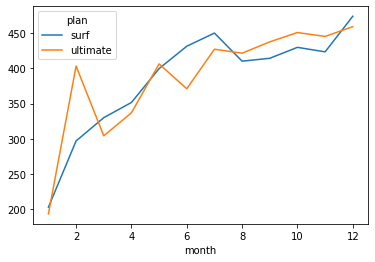

In [83]:
pivot_data.plot()
plt.show()

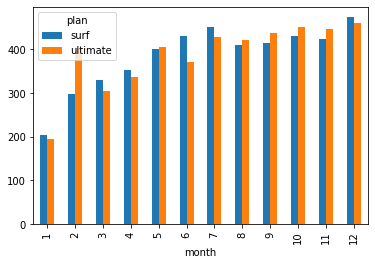

In [84]:
pivot_data.plot(kind="bar")
plt.show()

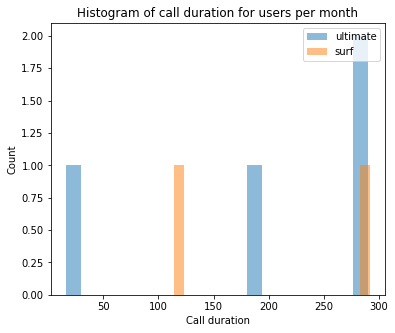

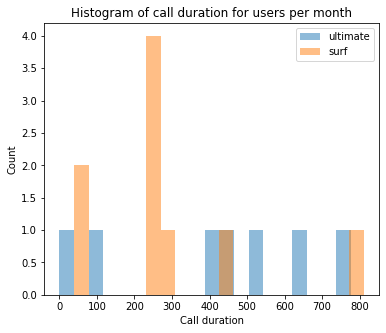

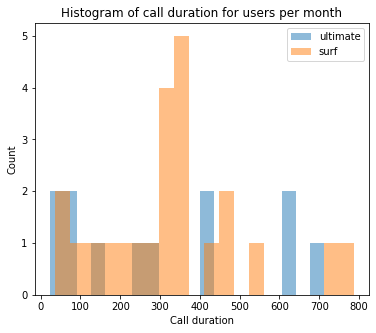

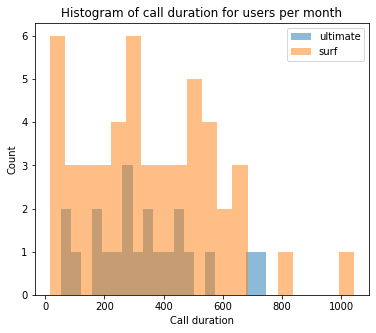

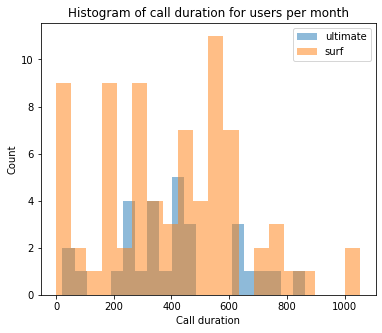

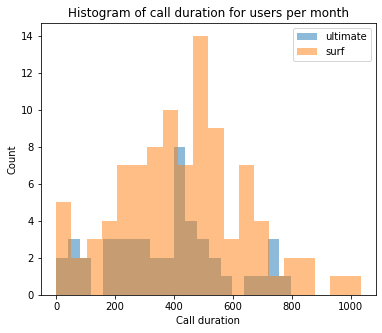

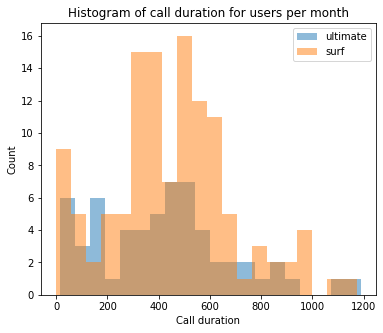

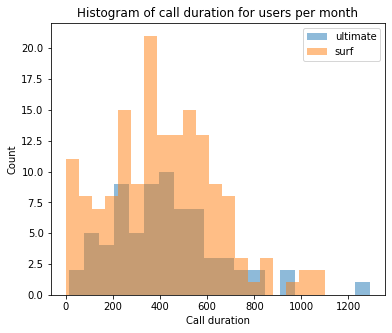

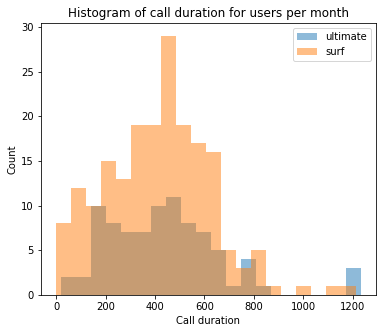

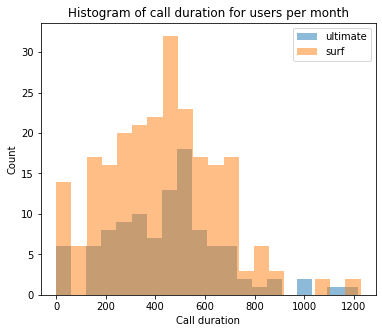

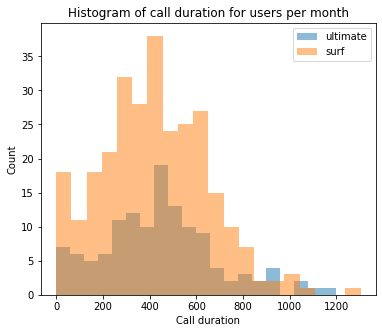

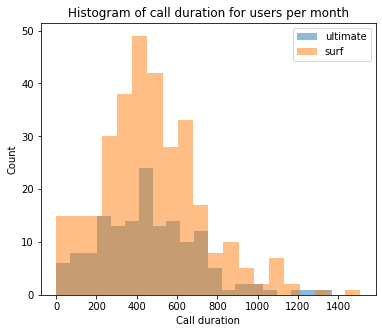

In [85]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

#these variables are used for iterators in the for loop.
months = list(revenue_df['month'].value_counts().index)
months = sorted(months)


for month in months:
    total_rev_df_month = revenue_df[revenue_df['month'] == month]
    
    
    plt.figure(figsize=(6,5))
    plt.hist(total_rev_df_month.loc[total_rev_df_month['plan'] =='ultimate','duration'], bins=20, alpha=0.5, label='ultimate')
    plt.hist(total_rev_df_month.loc[total_rev_df_month['plan'] =='surf', 'duration'], bins=20, alpha=0.5, label='surf')

    plt.xlabel('Call duration', size=10)
    plt.ylabel('Count', size=10)
    plt.title('Histogram of call duration for users per month')
    plt.legend(loc='upper right');


In [86]:
# Calculate the mean and the variance of the monthly call duration
pivot_data = revenue_df.pivot_table( index= 'month',
                                       columns='plan',
                                       values='duration',
                                       aggfunc=['mean','std','var','median'])

pivot_data

mean                     std                       var  \
plan         surf    ultimate        surf    ultimate          surf   
month                                                                 
1      203.000000  193.500000  125.865007  128.733575  15842.000000   
2      297.000000  403.142857  228.531179  277.289517  52226.500000   
3      330.000000  304.250000  189.233622  248.967732  35809.363636   
4      351.540000  336.857143  225.536567  186.785783  50866.743265   
5      399.584416  406.241379  244.446763  209.382537  59754.219754   
6      431.298969  370.957447  213.524304  206.163924  45592.628436   
7      449.983471  427.067797  246.992105  269.375898  61005.099725   
8      410.111111  421.436620  233.119381  231.614997  54344.645963   
9      414.226804  437.511628  215.860971  238.894254  46595.958656   
10     429.729958  450.735849  228.645280  232.941861  52278.664056   
11     423.325088  445.196850  227.171789  246.156907  51607.021602   
12     473.836478  459.099338  252.248923  250.007567  63629.518918   

                    median           
plan       ultimate   surf ultimate  
month                                
1      16572.333333  203.0    234.0  
2      76889.476190  254.0    428.0  
3      61984.931818  334.0    251.0  
4      34888.928571  339.5    301.0  
5      43841.046798  415.0    407.0  
6      42503.563367  423.0    399.0  
7      72563.374635  454.0    430.0  
8      53645.506640  392.0    406.0  
9      57070.464569  426.0    434.0  
10     54261.910512  432.0    460.5  
11     60593.222847  413.0    432.0  
12     62503.783400  449.0    436.0

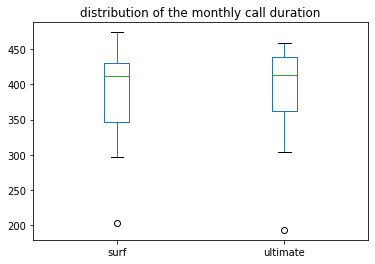

In [87]:
# Plot a boxplot to visualize the distribution of the monthly call duration

pivot_data_box_duration = revenue_df.pivot_table( index= 'month',
                                       columns='plan',
                                       values='duration',
                                       )

pivot_data_box_duration.plot(kind='box', title='distribution of the monthly call duration')
plt.show()


,user_id,month,num_calls_per_month,duration,num_messages_per_month,mb_used,gb_used_sum,plan,messages_included,mb_per_month_included,...,gb_more,messages_more,minutes_more,gb_over,messages_over,minutes_over,total_owed_from_gb,total_owed_from_messages,total_owed_from_minutes,total_this_month
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,1000,30720,...,28.0,989.0,2876.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
1,1006,11,2.0,10.0,15.0,2068.37,3.0,ultimate,1000,30720,...,27.0,985.0,2990.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
2,1006,12,9.0,59.0,139.0,32118.82,32.0,ultimate,1000,30720,...,-2.0,861.0,2941.0,2.0,0.0,0.0,14.0,0.00,0.0,84.00
3,1008,10,71.0,476.0,21.0,17106.99,17.0,ultimate,1000,30720,...,13.0,979.0,2524.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
4,1008,11,63.0,446.0,37.0,23676.72,24.0,ultimate,1000,30720,...,6.0,963.0,2554.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,12,0.0,0.0,56.0,31088.49,31.0,surf,50,15360,...,-16.0,-6.0,500.0,16.0,6.0,0.0,160.0,0.18,0.0,180.18
2289,1349,10,0.0,0.0,76.0,13093.55,13.0,surf,50,15360,...,2.0,-26.0,500.0,0.0,26.0,0.0,0.0,0.78,0.0,20.78
2290,1349,11,0.0,0.0,72.0,17128.26,17.0,surf,50,15360,...,-2.0,-22.0,500.0,2.0,22.0,0.0,20.0,0.66,0.0,40.66
2291,1349,12,0.0,0.0,61.0,13039.91,13.0,surf,50,15360,...,2.0,-11.0,500.0,0.0,11.0,0.0,0.0,0.33,0.0,20.33


plan,surf,ultimate
month,,
1,10.500000,15.500000
2,12.000000,21.571429
3,15.260870,20.250000
4,17.400000,22.047619
5,24.012987,32.103448
6,25.298969,29.340426
7,27.033058,32.830508
8,28.777778,38.478873
9,30.762887,37.895349


<AxesSubplot:title={'center':'number of messages users of each plan tend to send per month'}, xlabel='month'>

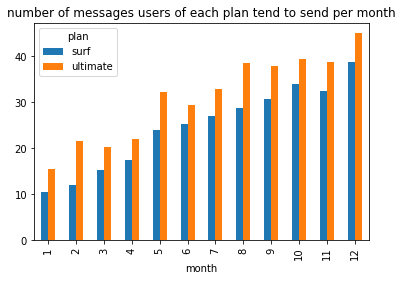

In [88]:
# Compare the number of messages users of each plan tend to send each month
revenue_df.columns
pivot_data_messages = revenue_df.pivot_table( index= 'month',
                                     columns= 'plan',
                                     values='num_messages_per_month'
                                     )
display(revenue_df)
display(pivot_data_messages)
pivot_data_messages.plot(kind='bar', title='number of messages users of each plan tend to send per month')

Index(['user_id', 'month', 'num_calls_per_month', 'duration',
       'num_messages_per_month', 'mb_used', 'gb_used_sum', 'plan',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'gb_per_month_included', 'gb_more', 'messages_more', 'minutes_more',
       'gb_over', 'messages_over', 'minutes_over', 'total_owed_from_gb',
       'total_owed_from_messages', 'total_owed_from_minutes',
       'total_this_month'],
      dtype='object')

,user_id,month,num_calls_per_month,duration,num_messages_per_month,mb_used,gb_used_sum,plan,messages_included,mb_per_month_included,...,gb_more,messages_more,minutes_more,gb_over,messages_over,minutes_over,total_owed_from_gb,total_owed_from_messages,total_owed_from_minutes,total_this_month
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,1000,30720,...,28.0,989.0,2876.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
1,1006,11,2.0,10.0,15.0,2068.37,3.0,ultimate,1000,30720,...,27.0,985.0,2990.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
2,1006,12,9.0,59.0,139.0,32118.82,32.0,ultimate,1000,30720,...,-2.0,861.0,2941.0,2.0,0.0,0.0,14.0,0.00,0.0,84.00
3,1008,10,71.0,476.0,21.0,17106.99,17.0,ultimate,1000,30720,...,13.0,979.0,2524.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
4,1008,11,63.0,446.0,37.0,23676.72,24.0,ultimate,1000,30720,...,6.0,963.0,2554.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,12,0.0,0.0,56.0,31088.49,31.0,surf,50,15360,...,-16.0,-6.0,500.0,16.0,6.0,0.0,160.0,0.18,0.0,180.18
2289,1349,10,0.0,0.0,76.0,13093.55,13.0,surf,50,15360,...,2.0,-26.0,500.0,0.0,26.0,0.0,0.0,0.78,0.0,20.78
2290,1349,11,0.0,0.0,72.0,17128.26,17.0,surf,50,15360,...,-2.0,-22.0,500.0,2.0,22.0,0.0,20.0,0.66,0.0,40.66
2291,1349,12,0.0,0.0,61.0,13039.91,13.0,surf,50,15360,...,2.0,-11.0,500.0,0.0,11.0,0.0,0.0,0.33,0.0,20.33


plan,surf,ultimate
month,,
1,10.500000,15.500000
2,12.000000,21.571429
3,15.260870,20.250000
4,17.400000,22.047619
5,24.012987,32.103448
6,25.298969,29.340426
7,27.033058,32.830508
8,28.777778,38.478873
9,30.762887,37.895349


<AxesSubplot:title={'center':'number of messages users of each plan tend to send per month'}, xlabel='month'>

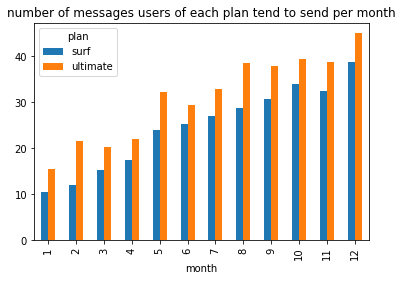

In [89]:
# Compare the amount of messages used by users per plan

revenue_df
display(revenue_df.columns)
pivot_data_text = revenue_df.pivot_table( index= 'month',
                                     columns= 'plan',
                                     values='num_messages_per_month'
                                     )
display(revenue_df)
display(pivot_data_text)
pivot_data_text.plot(kind='bar', title='number of messages users of each plan tend to send per month')

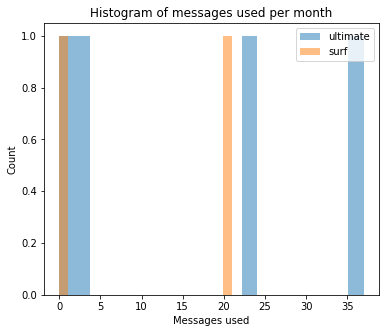

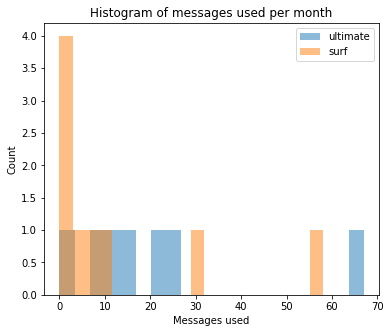

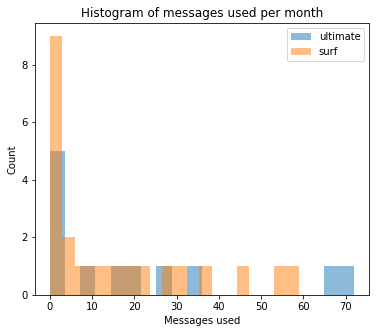

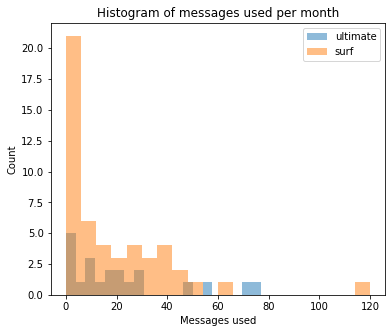

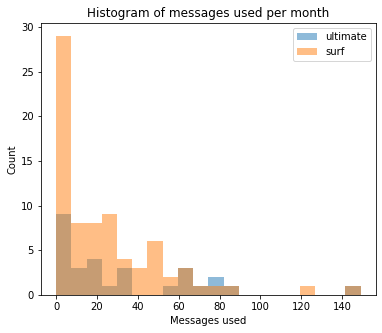

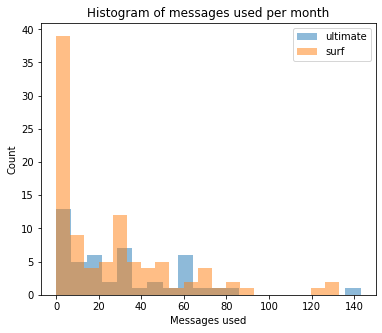

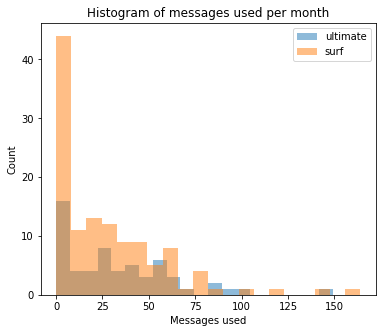

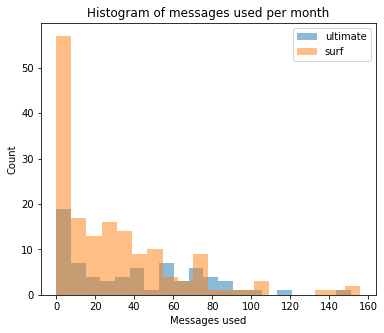

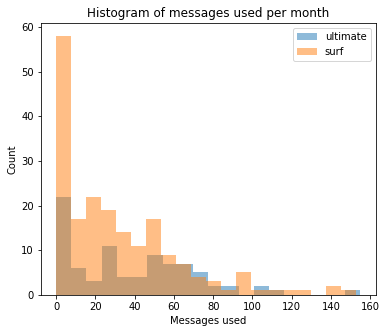

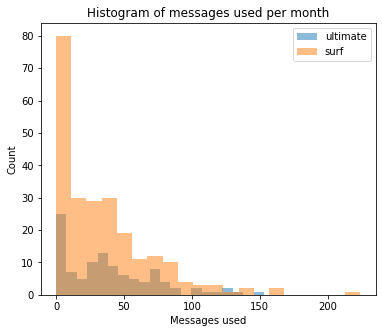

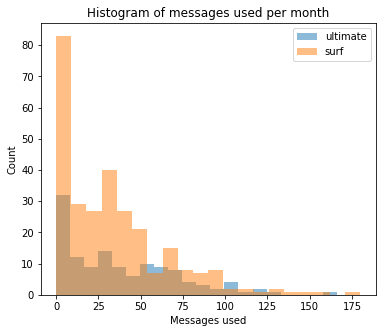

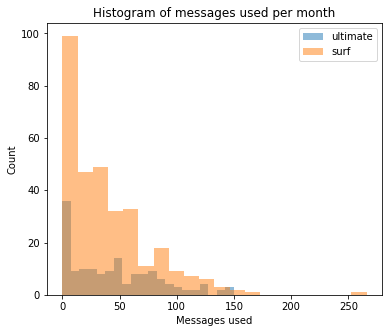

In [90]:
months = list(revenue_df['month'].value_counts().index)
months = sorted(months)


for month in months:
    total_rev_df_month_net = revenue_df[revenue_df['month'] == month]
    
    
    plt.figure(figsize=(6,5))
    plt.hist(total_rev_df_month_net.loc[total_rev_df_month_net['plan'] =='ultimate','num_messages_per_month'], bins=20, alpha=0.5, label='ultimate')
    plt.hist(total_rev_df_month_net.loc[total_rev_df_month_net['plan'] =='surf', 'num_messages_per_month'], bins=20, alpha=0.5, label='surf')

    plt.xlabel('Messages used', size=10)
    plt.ylabel('Count', size=10)
    plt.title('Histogram of messages used per month')
    plt.legend(loc='upper right');


In [91]:
# Calculate the mean and the variance of the monthly text messages
pivot_data_text_stats = revenue_df.pivot_table( index= 'month',
                                       columns='plan',
                                       values='num_messages_per_month',
                                       aggfunc=['mean','std','var','median','sum','max'])
pivot_data_text_stats

mean                   std                     var               \
plan        surf   ultimate       surf   ultimate         surf     ultimate   
month                                                                         
1      10.500000  15.500000  14.849242  17.710637   220.500000   313.666667   
2      12.000000  21.571429  19.646883  21.869744   386.000000   478.285714   
3      15.260870  20.250000  18.616262  25.580977   346.565217   654.386364   
4      17.400000  22.047619  22.396246  23.326972   501.591837   544.147619   
5      24.012987  32.103448  29.106652  36.018195   847.197198  1297.310345   
6      25.298969  29.340426  30.247646  29.285162   914.920103   857.620722   
7      27.033058  32.830508  30.395979  30.991741   923.915565   960.488019   
8      28.777778  38.478873  32.086064  34.588544  1029.515528  1196.367404   
9      30.762887  37.895349  31.683268  32.417871  1003.829496  1050.918331   
10     33.839662  39.443396  35.713663  34.944331  1275.465708  1221.106289   
11     32.385159  38.606299  32.639608  35.109389  1065.344034  1232.669166   
12     38.600629  45.006623  38.185843  39.362672  1458.158612  1549.419956   

      median               sum             max           
plan    surf ultimate     surf ultimate   surf ultimate  
month                                                    
1       10.5     12.5     21.0     62.0   21.0     37.0  
2        3.0     15.0    108.0    151.0   58.0     67.0  
3        7.0     12.0    351.0    243.0   59.0     72.0  
4       10.0     17.0    870.0    463.0  120.0     77.0  
5       15.0     19.0   1849.0    931.0  149.0    149.0  
6       15.0     21.0   2454.0   1379.0  133.0    143.0  
7       20.0     28.0   3271.0   1937.0  164.0    149.0  
8       20.0     36.0   4662.0   2732.0  156.0    151.0  
9       22.5     31.5   5968.0   3259.0  153.0    155.0  
10      26.0     35.0   8020.0   4181.0  224.0    153.0  
11      27.0     32.0   9165.0   4903.0  180.0    166.0  
12      31.0     41.0  12275.0   6796.0  266.0    150.0

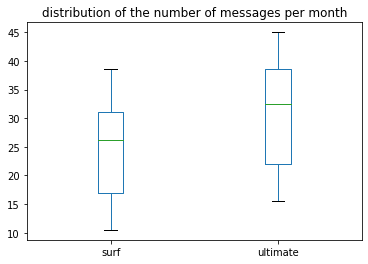

In [92]:
# Plot a boxplot to visualize the distribution of the message usage

pivot_data_box_duration = revenue_df.pivot_table( index= 'month',
                                       columns='plan',
                                       values='num_messages_per_month',
                                       )

pivot_data_box_duration.plot(kind='box', title='distribution of the number of messages per month')
plt.show()

Index(['user_id', 'month', 'num_calls_per_month', 'duration',
       'num_messages_per_month', 'mb_used', 'gb_used_sum', 'plan',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'gb_per_month_included', 'gb_more', 'messages_more', 'minutes_more',
       'gb_over', 'messages_over', 'minutes_over', 'total_owed_from_gb',
       'total_owed_from_messages', 'total_owed_from_minutes',
       'total_this_month'],
      dtype='object')

,user_id,month,num_calls_per_month,duration,num_messages_per_month,mb_used,gb_used_sum,plan,messages_included,mb_per_month_included,...,gb_more,messages_more,minutes_more,gb_over,messages_over,minutes_over,total_owed_from_gb,total_owed_from_messages,total_owed_from_minutes,total_this_month
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,1000,30720,...,28.0,989.0,2876.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
1,1006,11,2.0,10.0,15.0,2068.37,3.0,ultimate,1000,30720,...,27.0,985.0,2990.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
2,1006,12,9.0,59.0,139.0,32118.82,32.0,ultimate,1000,30720,...,-2.0,861.0,2941.0,2.0,0.0,0.0,14.0,0.00,0.0,84.00
3,1008,10,71.0,476.0,21.0,17106.99,17.0,ultimate,1000,30720,...,13.0,979.0,2524.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
4,1008,11,63.0,446.0,37.0,23676.72,24.0,ultimate,1000,30720,...,6.0,963.0,2554.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,12,0.0,0.0,56.0,31088.49,31.0,surf,50,15360,...,-16.0,-6.0,500.0,16.0,6.0,0.0,160.0,0.18,0.0,180.18
2289,1349,10,0.0,0.0,76.0,13093.55,13.0,surf,50,15360,...,2.0,-26.0,500.0,0.0,26.0,0.0,0.0,0.78,0.0,20.78
2290,1349,11,0.0,0.0,72.0,17128.26,17.0,surf,50,15360,...,-2.0,-22.0,500.0,2.0,22.0,0.0,20.0,0.66,0.0,40.66
2291,1349,12,0.0,0.0,61.0,13039.91,13.0,surf,50,15360,...,2.0,-11.0,500.0,0.0,11.0,0.0,0.0,0.33,0.0,20.33


plan,surf,ultimate
month,,
1,5.000000,7.250000
2,12.222222,17.285714
3,13.565217,18.416667
4,12.220000,16.333333
5,14.116883,16.862069
6,15.484536,15.425532
7,16.876033,16.491525
8,16.882716,17.845070
9,16.690722,17.011628


<AxesSubplot:title={'center':'number of messages users of each plan tend to send per month'}, xlabel='month'>

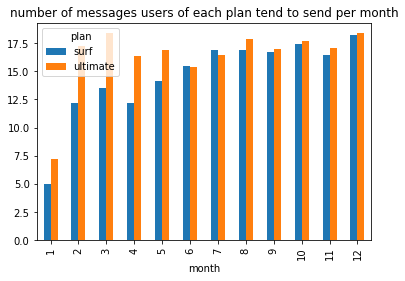

In [93]:

# Compare the amount of internet traffic consumed by users per plan

revenue_df
display(revenue_df.columns)
pivot_data_internet = revenue_df.pivot_table( index= 'month',
                                     columns= 'plan',
                                     values='gb_used_sum'
                                     )
display(revenue_df)
display(pivot_data_internet)
pivot_data_internet.plot(kind='bar', title='number of messages users of each plan tend to send per month')

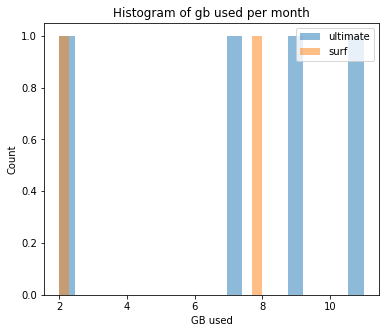

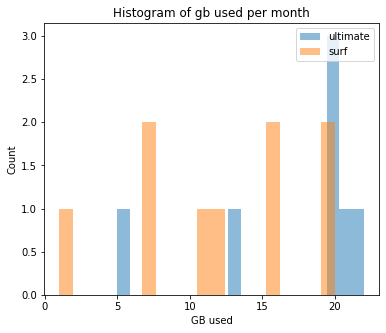

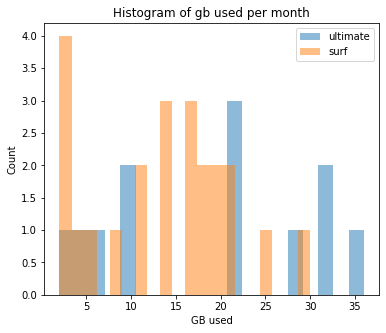

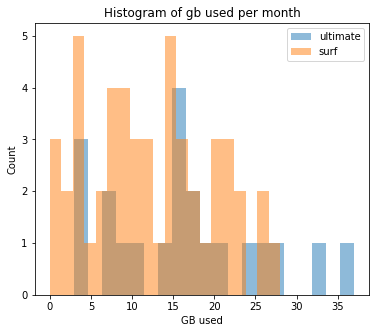

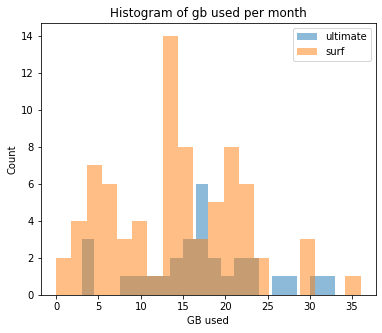

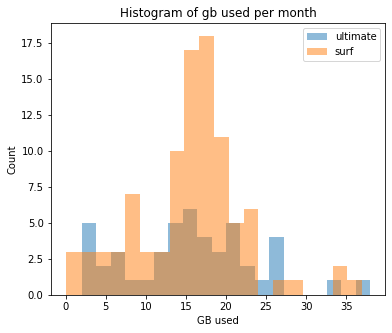

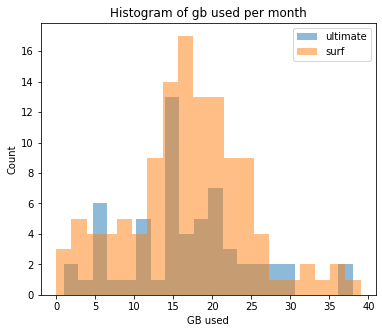

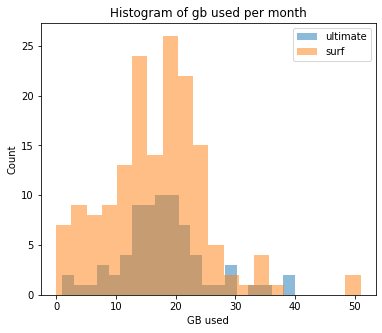

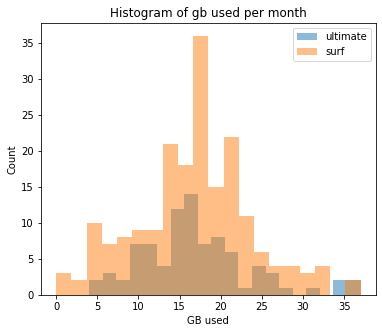

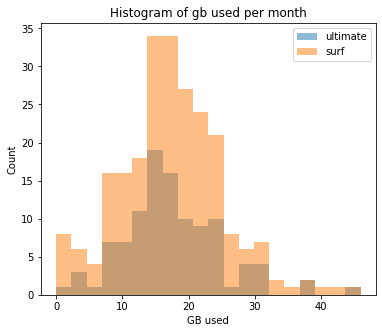

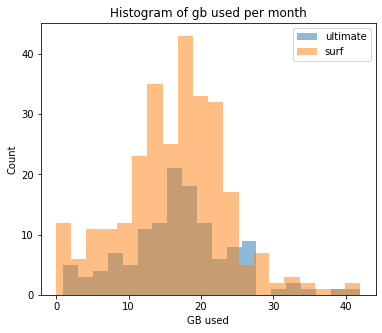

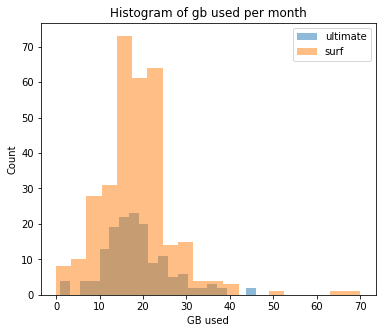

In [94]:
# Compare the number of used gb of each plan require each month. Plot a histogram.

#these variables are used for iterators in the for loop.
months = list(revenue_df['month'].value_counts().index)
months = sorted(months)


for month in months:
    total_rev_df_month_gb = revenue_df[revenue_df['month'] == month]
    
    
    plt.figure(figsize=(6,5))
    plt.hist(total_rev_df_month_gb.loc[total_rev_df_month_gb['plan'] =='ultimate','gb_used_sum'], bins=20, alpha=0.5, label='ultimate')
    plt.hist(total_rev_df_month_gb.loc[total_rev_df_month_gb['plan'] =='surf', 'gb_used_sum'], bins=20, alpha=0.5, label='surf')

    plt.xlabel('GB used', size=10)
    plt.ylabel('Count', size=10)
    plt.title('Histogram of gb used per month')
    plt.legend(loc='upper right');


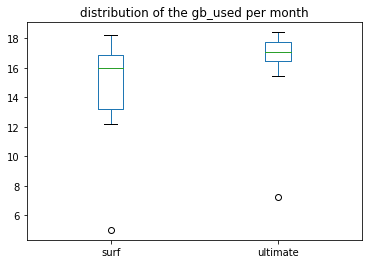

In [95]:
# Calculate the mean and the variance of the monthly internet data usage


pivot_data_box_duration = revenue_df.pivot_table( index= 'month',
                                       columns='plan',
                                       values='gb_used_sum',
                                       )

pivot_data_box_duration.plot(kind='box', title='distribution of the gb_used per month')
plt.show()

Conclusion:<br>
On average; half of the surf user population goes over package limits monthly.  
Ultimate users stayed within their package limits and mid/end of the year the ultimate users and surf users, used just about the same amount of data monthly.  Keeping ultimate users within package limits and about half of surf users just outside of package limits.

In [96]:
revenue_df.columns

Index(['user_id', 'month', 'num_calls_per_month', 'duration',
       'num_messages_per_month', 'mb_used', 'gb_used_sum', 'plan',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'gb_per_month_included', 'gb_more', 'messages_more', 'minutes_more',
       'gb_over', 'messages_over', 'minutes_over', 'total_owed_from_gb',
       'total_owed_from_messages', 'total_owed_from_minutes',
       'total_this_month'],
      dtype='object')

In [97]:
revenue_df

,user_id,month,num_calls_per_month,duration,num_messages_per_month,mb_used,gb_used_sum,plan,messages_included,mb_per_month_included,...,gb_more,messages_more,minutes_more,gb_over,messages_over,minutes_over,total_owed_from_gb,total_owed_from_messages,total_owed_from_minutes,total_this_month
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,1000,30720,...,28.0,989.0,2876.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
1,1006,11,2.0,10.0,15.0,2068.37,3.0,ultimate,1000,30720,...,27.0,985.0,2990.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
2,1006,12,9.0,59.0,139.0,32118.82,32.0,ultimate,1000,30720,...,-2.0,861.0,2941.0,2.0,0.0,0.0,14.0,0.00,0.0,84.00
3,1008,10,71.0,476.0,21.0,17106.99,17.0,ultimate,1000,30720,...,13.0,979.0,2524.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
4,1008,11,63.0,446.0,37.0,23676.72,24.0,ultimate,1000,30720,...,6.0,963.0,2554.0,0.0,0.0,0.0,0.0,0.00,0.0,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,12,0.0,0.0,56.0,31088.49,31.0,surf,50,15360,...,-16.0,-6.0,500.0,16.0,6.0,0.0,160.0,0.18,0.0,180.18
2289,1349,10,0.0,0.0,76.0,13093.55,13.0,surf,50,15360,...,2.0,-26.0,500.0,0.0,26.0,0.0,0.0,0.78,0.0,20.78
2290,1349,11,0.0,0.0,72.0,17128.26,17.0,surf,50,15360,...,-2.0,-22.0,500.0,2.0,22.0,0.0,20.0,0.66,0.0,40.66
2291,1349,12,0.0,0.0,61.0,13039.91,13.0,surf,50,15360,...,2.0,-11.0,500.0,0.0,11.0,0.0,0.0,0.33,0.0,20.33


In [98]:
revenue_df.loc[1244]

user_id                         1166
month                             12
num_calls_per_month             24.0
duration                       215.0
num_messages_per_month           0.0
mb_used                     19746.03
gb_used_sum                     20.0
plan                            surf
messages_included                 50
mb_per_month_included          15360
minutes_included                 500
usd_monthly_pay                   20
usd_per_gb                        10
usd_per_message                 0.03
usd_per_minute                  0.03
gb_per_month_included           15.0
gb_more                         -5.0
messages_more                   50.0
minutes_more                   285.0
gb_over                          5.0
messages_over                    0.0
minutes_over                     0.0
total_owed_from_gb              50.0
total_owed_from_messages         0.0
total_owed_from_minutes          0.0
total_this_month                70.0
Name: 1244, dtype: object

In [99]:
# min','mean','median','var','std','max of the revenue

pivot_data_revenue_agg = revenue_df.pivot_table( index= 'month',
                                     columns= 'plan',
                                     values='total_this_month',
                                     aggfunc= ['min','mean','median','var','std','max']
                                     )
display(pivot_data_revenue_agg)

min                mean             median                   var  \
plan   surf ultimate       surf   ultimate    surf ultimate         surf   
month                                                                      
1      20.0     70.0  20.000000  70.000000  20.000     70.0     0.000000   
2      20.0     70.0  34.396667  70.000000  29.570     70.0   428.276100   
3      20.0     70.0  45.941304  74.666667  20.000     70.0  1512.023512   
4      20.0     70.0  40.710600  73.000000  20.000     70.0  1198.958402   
5      20.0     70.0  47.628182  70.724138  21.740     70.0  1967.540055   
6      20.0     70.0  49.276289  71.638298  30.150     70.0  1988.914046   
7      20.0     70.0  62.674050  71.898305  40.330     70.0  2943.388409   
8      20.0     70.0  63.931173  72.859155  41.980     70.0  3587.494901   
9      20.0     70.0  58.271495  72.034884  40.045     70.0  2260.644980   
10     20.0     70.0  65.421224  72.311321  50.000     70.0  3198.242612   
11     20.0     70.0  58.004276  71.708661  40.000     70.0  2494.182230   
12     20.0     70.0  70.557044  73.291391  50.000     70.0  4604.410868   

                         std                max           
plan     ultimate       surf   ultimate    surf ultimate  
month                                                     
1        0.000000   0.000000   0.000000   20.00     70.0  
2        0.000000  20.694833   0.000000   70.00     70.0  
3      145.515152  38.884747  12.062966  170.00    112.0  
4      120.400000  34.625979  10.972693  150.00    119.0  
5       15.206897  44.356962   3.899602  231.95     91.0  
6       75.018501  44.597243   8.661322  240.00    126.0  
7      104.472238  54.253004  10.221166  260.63    126.0  
8      154.808451  59.895700  12.442204  380.00    140.0  
9       75.939945  47.546240   8.714353  240.78    119.0  
10     169.606918  56.553007  13.023322  330.00    182.0  
11      94.668416  49.941788   9.729770  290.36    154.0  
12     212.861192  67.855809  14.589763  590.37    182.0

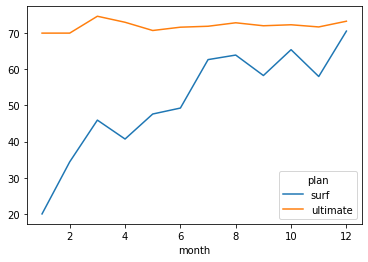

In [100]:
pivot_data_revenue_agg['mean'].plot()
plt.show()

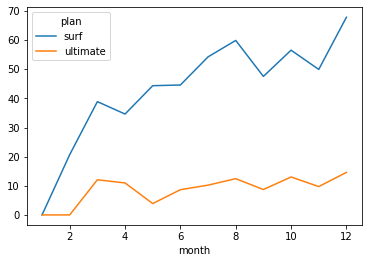

In [101]:
pivot_data_revenue_agg['std'].plot()
plt.show()

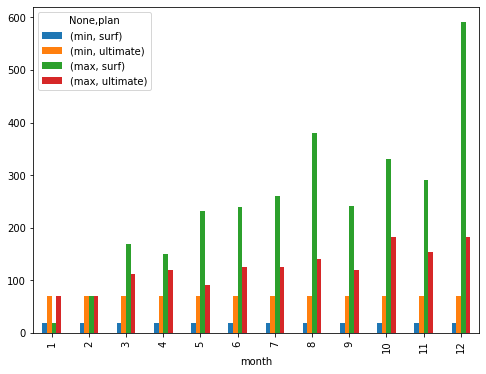

In [102]:
pivot_data_revenue_agg[['min','max']].plot(kind='bar', figsize=(8,6))
plt.show()

In [103]:
pivot_data_revenue_sum = revenue_df.pivot_table( index= 'month',
                                     columns= 'plan',
                                     values='total_this_month',
                                     aggfunc= 'sum'
                                     )
display(pivot_data_revenue_sum)
plt.show()

plan,surf,ultimate
month,,
1,40.00,280.0
2,309.57,490.0
3,1056.65,896.0
4,2035.53,1533.0
5,3667.37,2051.0
6,4779.80,3367.0
7,7583.56,4242.0
8,10356.85,5173.0
9,11304.67,6195.0


Conclusion about the difference of revenue of plans.<br>
The revenue shows, that surf users certainly bring in more revenue! By the second month of the year surf users start with paying overages, and by the 3rd month and throughout the year; surf users are consistently paying considerably more money than the ultimate users because of package limit overages. 

## Test statistical hypotheses

 Here I calculate the hypothesis.
 
<br>
Null hypothesis: The average revenue from users of Ultimate and Surf calling plans does not differ.<br>
Alternative hypothesis: The average revenue from users of Ultimate and Surf calling plans differs.

In [104]:
# Subset the data by plan
ultimate_revenue = revenue_df[revenue_df['plan'] == 'ultimate']['total_this_month']
surf_revenue = revenue_df[revenue_df['plan'] == 'surf']['total_this_month']

# Perform the t-test
alpha = 0.05
results = st.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)
print('p-value:', results.pvalue)

# Determine whether to reject the null hypothesis
if (results.pvalue < alpha):
    print('We reject the null hypothesis')
    print("The means of both are different.")
else:
    print("We can't reject the null hypothesis")
    print("The means of both are the same.")

p-value: 3.17039054811355e-15
We reject the null hypothesis
The means of both are different.


Conclusion<br>
I tested for H0; We reject/do not accept the null hypothesis. The plans are different, leading to different average revenues. The price does make a difference.
<br><br><br>


Null hypothesis: The average revenue from users in the NY-NJ area does not differ from that of the users from the other regions.
<br> Alternative hypothesis: The average revenue from users in the NY-NJ area does differ from that of the users from the other regions.

In [105]:
users_df['city_region'].unique()

array(['Atlanta-Sandy Springs-Roswell', 'Seattle-Tacoma-Bellevue',
       'Las Vegas-Henderson-Paradise', 'Tulsa',
       'Dallas-Fort Worth-Arlington', 'San Francisco-Oakland-Berkeley',
       'Grand Rapids-Kentwood', 'Orlando-Kissimmee-Sanford',
       'San Jose-Sunnyvale-Santa Clara', 'Cleveland-Elyria',
       'Chicago-Naperville-Elgin', 'Knoxville',
       'New York-Newark-Jersey City', 'Pittsburgh', 'Fresno',
       'Washington-Arlington-Alexandria', 'Indianapolis-Carmel-Anderson',
       'Jacksonville', 'Los Angeles-Long Beach-Anaheim',
       'Omaha-Council Bluffs', 'Houston-The Woodlands-Sugar Land',
       'Philadelphia-Camden-Wilmington',
       'Tampa-St. Petersburg-Clearwater', 'Birmingham-Hoover',
       'Oklahoma City', 'Charlotte-Concord-Gastonia',
       'Denver-Aurora-Lakewood',
       'Nashville-Davidson–Murfreesboro–Franklin', 'Columbus',
       'Albuquerque', 'Boston-Cambridge-Newton',
       'Miami-Fort Lauderdale-West Palm Beach',
       'San Diego-Chula Vista-Ca

In [106]:
hypoth_ny_nj_df = revenue_df.merge(users_df, on='user_id')

In [107]:
# Test the hypotheses

#null hypo that are they are same ___ NULL HYPO IS ALWAYS EQUALITY
#NOT REJECTING HYPO = THEY ARE NOT DIFFERENT

#H1 =
#h2= DIFFERENT
#2 DF -

# Subset the data by plan
ultimate_revenue = hypoth_ny_nj_df[hypoth_ny_nj_df['city_region'] == 'New York-Newark-Jersey City']['total_this_month']
surf_revenue = hypoth_ny_nj_df[hypoth_ny_nj_df['city_region'] != 'New York-Newark-Jersey City']['total_this_month']

# Perform the t-test
alpha = 0.05
results = st.ttest_ind(ultimate_revenue, surf_revenue)
print('p-value:', results.pvalue)

# Determine whether to reject the null hypothesis
if (results.pvalue < alpha) and (ultimate_revenue.mean() < surf_revenue.mean()):
    print('We reject the null hypothesis')
    print("The means of both are different.")
else:
    print("We can't reject the null hypothesis")
    print("The means of both are the same.")

p-value: 0.04355743162134274
We reject the null hypothesis
The means of both are different.


## General conclusion

Organizing the data properly, helped when it came time to aggregate columns and functions.  
<br><br>
As far as analyzing the data:<br>
Surf users bring in significantly more revenue for the company.  Because the behaviors of the surf users consistenly put them in overages, allowing the company to make more money from their mis-management of package limits.  Although Ultimate users pay more monthly; they did not go over their plan restrictions and thus paid no extra monies outside of their regular monthly charge. -BB